# Reference

**Feature Extraction and Statistical Analysis**

Following the same approach used in the affective touch protocol, we extracted the features as summarized in table: 

1. Npeak: Number of significant SMNA peaks wrw
2. AUC: Area under curve of reconstructed phasic signal wrw (mus s)
3. Peak: Maximum amplitude of significant peaks of SMNA signal wrw 
4. Mean Tonic: Mean value of the tonic component within each image time window 


Likewise, the affective touch, a statiscal analysis among the 5 smells were performed on the arousal and valence scores, and on the EDA phasic and tonic features. 

We distinguished the _event-related phasic analysis_ i.e. EDA was studied within a time window of 5s correspondent to the affective stimulus session, and the _non specific fluctuation and tonic analysis_ comprising the tonic level comparison and the differential value of the tonic features between the post- and pre stimulus session.

the difference among the smeels were studied using the **Friedman test**, and in case of rejection of the **Friedman test** null hypothesis, a post-hoc analysis was performaed by means of a **Bonferroni corrected Wilcoxon signed-rank**.

# Import data 

In [2]:
import numpy as np 
# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxEDA
import datetime
from scipy import stats
from mpl_toolkits import mplot3d
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.stats import ks_2samp
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
from sklearn.preprocessing import normalize
sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# Sampling frequency 4Hz ~= 0.25s
fl_eda_7 = pd.read_csv('data/exp_7/EDA.csv' , header= None)
fl_eda_7.columns  = ['eda']
fl_eda_freq_7 = fl_eda_7.iloc[1].values
print(len(fl_eda_7))
print('freq: ', fl_eda_freq_7)
fl_eda_7.head(10)

8024
freq:  [4.]


,eda
0,1.528332e+09
1,4.000000e+00
2,0.000000e+00
3,3.623110e-01
4,4.186420e-01
5,4.224830e-01
6,4.199230e-01
7,4.173620e-01
8,4.160820e-01
9,4.135210e-01


In [4]:
# Sampling frequency 4Hz ~= 0.25s
fl_temp_7 = pd.read_csv('data/exp_7/TEMP.csv' , header= None)
fl_temp_7.columns  = ['temp']
fl_temp_freq_7 = fl_temp_7.iloc[1].values
print(len(fl_temp_7))
print('freq: ', fl_temp_freq_7)
fl_temp_7.head(10)

8026
freq:  [4.]


,temp
0,1.528332e+09
1,4.000000e+00
2,3.103000e+01
3,3.103000e+01
4,3.103000e+01
5,3.103000e+01
6,3.103000e+01
7,3.103000e+01
8,3.103000e+01
9,3.103000e+01


In [5]:
fl_init_time_7 = datetime.datetime.utcfromtimestamp(fl_eda_7.iloc[0]).strftime('%Y-%m-%d %H:%M:%S.000')
fl_init_time_7

'2018-06-07 00:48:15.000'

In [6]:
fl_eda_7 = fl_eda_7.iloc[3:]
fl_temp_7 = fl_temp_7.iloc[3:]

In [7]:
#create index 
fl_time_eda_7= pd.date_range(start=fl_init_time_7, periods=len(fl_eda_7), 
                              freq=str(1/int(fl_eda_freq_7))+'S')
fl_time_eda_7

DatetimeIndex([       '2018-06-07 00:48:15', '2018-06-07 00:48:15.250000',
               '2018-06-07 00:48:15.500000', '2018-06-07 00:48:15.750000',
                      '2018-06-07 00:48:16', '2018-06-07 00:48:16.250000',
               '2018-06-07 00:48:16.500000', '2018-06-07 00:48:16.750000',
                      '2018-06-07 00:48:17', '2018-06-07 00:48:17.250000',
               ...
               '2018-06-07 01:21:37.750000',        '2018-06-07 01:21:38',
               '2018-06-07 01:21:38.250000', '2018-06-07 01:21:38.500000',
               '2018-06-07 01:21:38.750000',        '2018-06-07 01:21:39',
               '2018-06-07 01:21:39.250000', '2018-06-07 01:21:39.500000',
               '2018-06-07 01:21:39.750000',        '2018-06-07 01:21:40'],
              dtype='datetime64[ns]', length=8021, freq='250L')

In [8]:
fl_time_temp_7 = pd.date_range(start=fl_init_time_7, periods=len(fl_temp_7), 
                              freq=str(1/int(fl_temp_freq_7))+'S')
fl_time_temp_7

DatetimeIndex([       '2018-06-07 00:48:15', '2018-06-07 00:48:15.250000',
               '2018-06-07 00:48:15.500000', '2018-06-07 00:48:15.750000',
                      '2018-06-07 00:48:16', '2018-06-07 00:48:16.250000',
               '2018-06-07 00:48:16.500000', '2018-06-07 00:48:16.750000',
                      '2018-06-07 00:48:17', '2018-06-07 00:48:17.250000',
               ...
               '2018-06-07 01:21:38.250000', '2018-06-07 01:21:38.500000',
               '2018-06-07 01:21:38.750000',        '2018-06-07 01:21:39',
               '2018-06-07 01:21:39.250000', '2018-06-07 01:21:39.500000',
               '2018-06-07 01:21:39.750000',        '2018-06-07 01:21:40',
               '2018-06-07 01:21:40.250000', '2018-06-07 01:21:40.500000'],
              dtype='datetime64[ns]', length=8023, freq='250L')

In [9]:
fl_eda_7 = fl_eda_7.set_index(fl_time_eda_7, drop =True)
fl_eda_7 = fl_eda_7[:]
fl_eda_7 = fl_eda_7.dropna()
print(len(fl_eda_7))
fl_eda_7.head()

8021


,eda
2018-06-07 00:48:15.000,0.362311
2018-06-07 00:48:15.250,0.418642
2018-06-07 00:48:15.500,0.422483
2018-06-07 00:48:15.750,0.419923
2018-06-07 00:48:16.000,0.417362


In [10]:
fl_temp_7 = fl_temp_7.set_index(fl_time_temp_7, drop =True)
fl_temp_7 = fl_temp_7[:]
fl_temp_7 = fl_temp_7.dropna()
print(len(fl_temp_7))
fl_temp_7.head()

8023


,temp
2018-06-07 00:48:15.000,31.03
2018-06-07 00:48:15.250,31.03
2018-06-07 00:48:15.500,31.03
2018-06-07 00:48:15.750,31.03
2018-06-07 00:48:16.000,31.03


# Remove Outliers

In [11]:
fl_exp7 = fl_eda_7.copy()#example dataset of normally distributed data. 
fl_exp7['temp'] = fl_temp_7['temp']
fl_exp7['present'] = 1
# fl_exp6 = fl_exp6.reset_index(drop= True)?

fl_exp7= fl_exp7[np.abs(fl_exp7.eda-fl_exp7.eda.mean())<=(3*fl_exp7.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp7= fl_exp7[~(np.abs(fl_exp7.eda-fl_exp7.eda.mean())>(3*fl_exp7.eda.std()))] #or if you prefer the other way around
fl_exp7 = fl_exp7.dropna()
print(len(fl_exp7))
fl_exp7.head()

7992


,eda,temp,present
2018-06-07 00:48:15.250,0.418642,31.03,1
2018-06-07 00:48:15.500,0.422483,31.03,1
2018-06-07 00:48:15.750,0.419923,31.03,1
2018-06-07 00:48:16.000,0.417362,31.03,1
2018-06-07 00:48:16.250,0.416082,31.03,1


## Tags - Marked Time Stamps

In [12]:
tags_7 = pd.read_csv('data/exp_7/tags/tags.csv' , header= None)
tags_7.columns  =  ['tagged_time']
tags_7.head()

,tagged_time
0,1.528333e+09
1,1.528333e+09
2,1.528333e+09
3,1.528333e+09
4,1.528333e+09


In [13]:
tags_7.tagged_time = [datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S.000') for x in tags_7.tagged_time]


In [14]:
tags_7.tagged_time

0    2018-06-07 00:49:35.000
1    2018-06-07 00:54:50.000
2    2018-06-07 00:59:39.000
3    2018-06-07 01:01:06.000
4    2018-06-07 01:01:38.000
5    2018-06-07 01:01:54.000
6    2018-06-07 01:06:26.000
7    2018-06-07 01:06:30.000
8    2018-06-07 01:09:34.000
9    2018-06-07 01:16:35.000
Name: tagged_time, dtype: object

In [15]:
tags_7 = tags_7.drop(6)
tags_7= tags_7.reset_index(drop=True)

In [16]:
tags_7

,tagged_time
0,2018-06-07 00:49:35.000
1,2018-06-07 00:54:50.000
2,2018-06-07 00:59:39.000
3,2018-06-07 01:01:06.000
4,2018-06-07 01:01:38.000
5,2018-06-07 01:01:54.000
6,2018-06-07 01:06:30.000
7,2018-06-07 01:09:34.000
8,2018-06-07 01:16:35.000


# Separate data frame 

## Cold-shower period 

In [17]:
fl_cs_7 = fl_exp7.loc[tags_7.tagged_time[6]:tags_7.tagged_time[7]]
fl_cs_7

,eda,temp,present
2018-06-07 01:06:30.000,0.412241,34.07,1
2018-06-07 01:06:30.250,0.410961,34.07,1
2018-06-07 01:06:30.500,0.413521,34.07,1
2018-06-07 01:06:30.750,0.413521,34.07,1
2018-06-07 01:06:31.000,0.412241,34.07,1
2018-06-07 01:06:31.250,0.410961,34.07,1
2018-06-07 01:06:31.500,0.410961,34.07,1
2018-06-07 01:06:31.750,0.417362,34.09,1
2018-06-07 01:06:32.000,0.410961,34.09,1
2018-06-07 01:06:32.250,0.409681,34.09,1


## Anticipatory period 

In [18]:
fl_ar_7 = fl_exp7.loc[tags_7.tagged_time[3]:tags_7.tagged_time[5]]

## Pre- and Post- data separation

In [19]:
fl_pre_7 = fl_exp7.loc[tags_7.tagged_time[0]:tags_7.tagged_time[1]]
fl_pre_7.head()

,eda,temp,present
2018-06-07 00:49:35.000,0.391757,31.05,1
2018-06-07 00:49:35.250,0.386636,31.05,1
2018-06-07 00:49:35.500,0.391757,31.05,1
2018-06-07 00:49:35.750,0.391757,31.05,1
2018-06-07 00:49:36.000,0.390477,31.05,1


In [20]:
len(fl_pre_7)

1264

In [21]:
fl_post_7 = fl_exp7.loc[tags_7.tagged_time[7]:tags_7.tagged_time[8]]
fl_post_7.head()

,eda,temp,present
2018-06-07 01:09:34.000,0.400719,33.84,1
2018-06-07 01:09:34.250,0.400719,33.84,1
2018-06-07 01:09:34.500,0.396878,33.84,1
2018-06-07 01:09:34.750,0.396878,33.83,1
2018-06-07 01:09:35.000,0.396878,33.83,1


In [22]:
len(fl_post_7)

1678

In [23]:
fl_post_7 = fl_post_7[:1264]
len(fl_post_7)

1264

# Visualization 

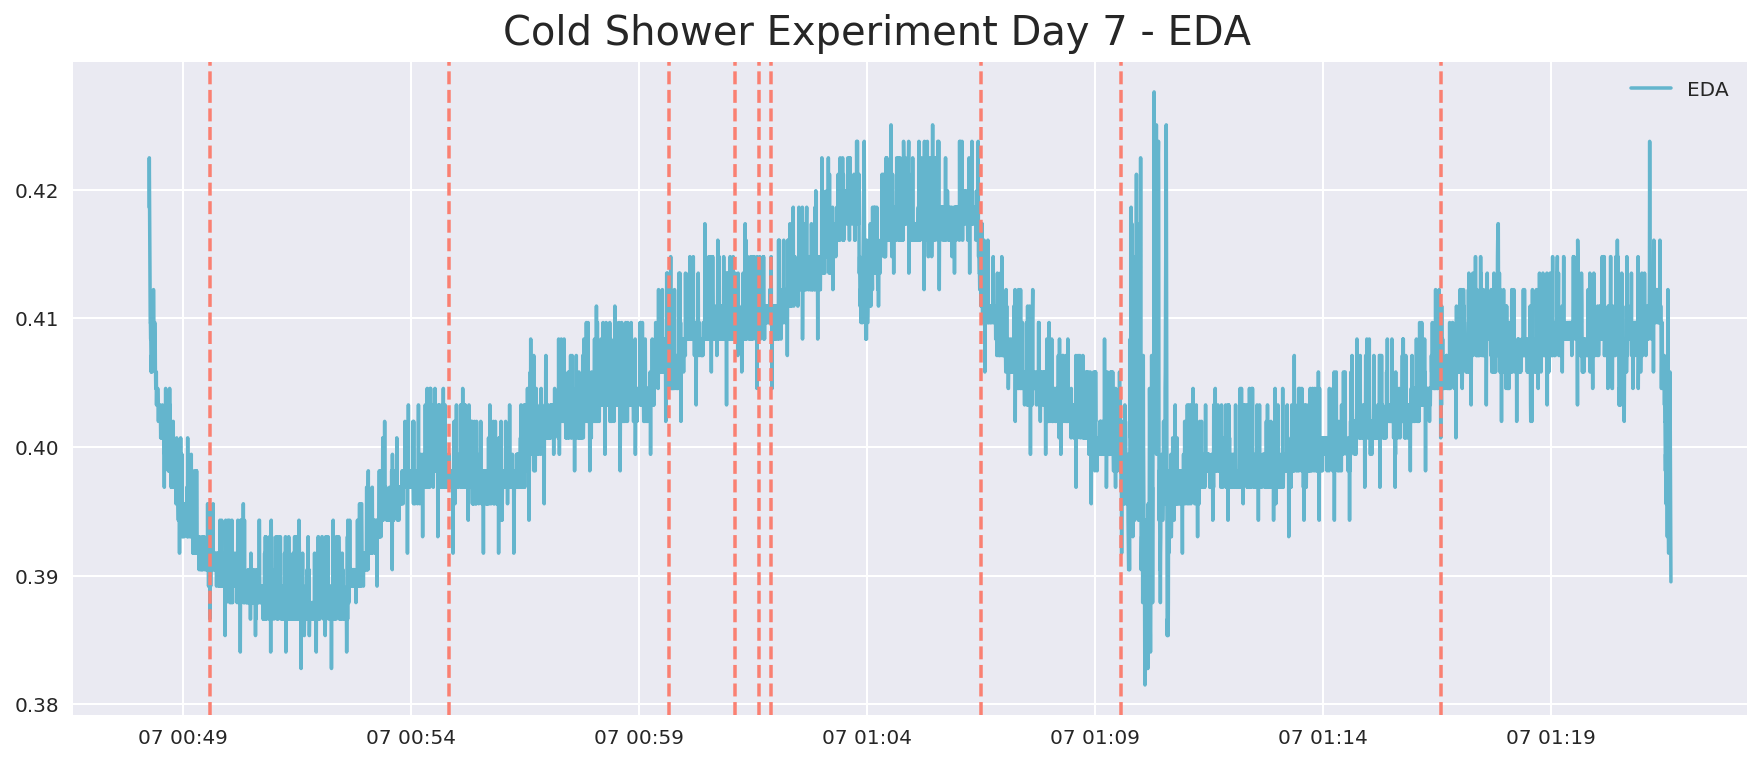

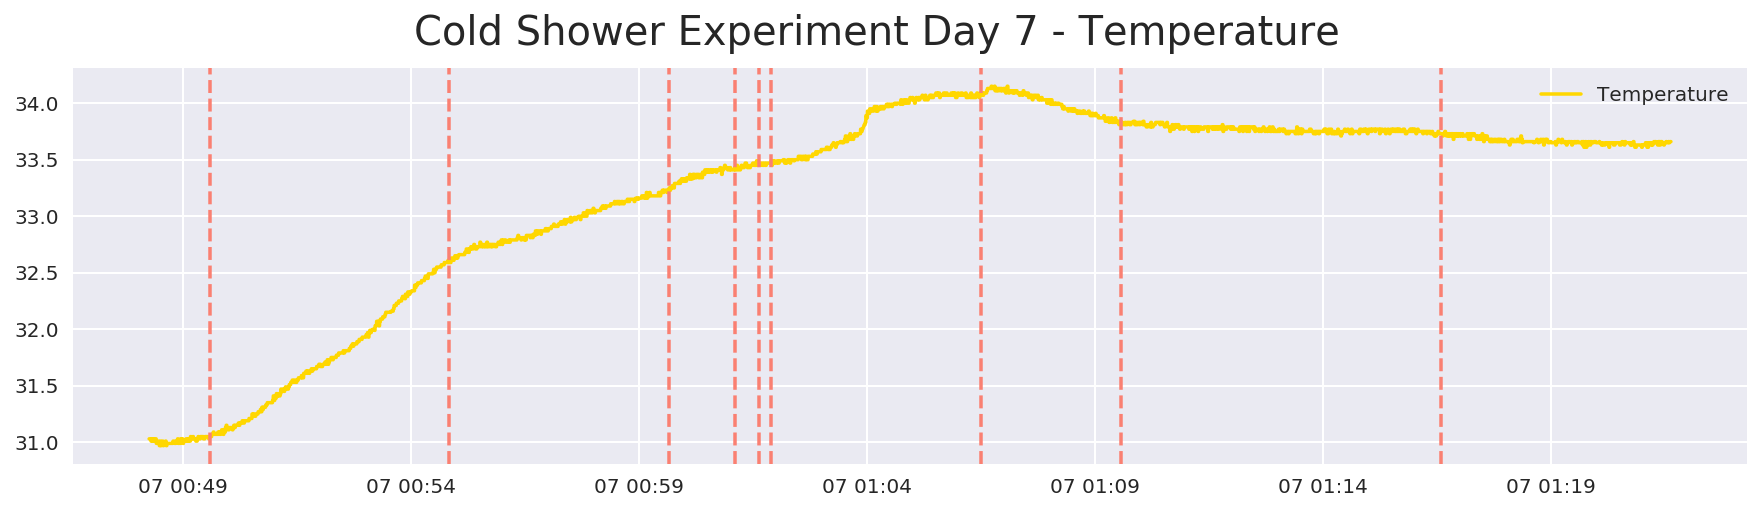

In [24]:
plt.figure(figsize=(15,6))
plt.subplot(111)

plt.plot(fl_exp7['eda'],color ='c')
plt.figtext(.5,.9,'Cold Shower Experiment Day 7 - EDA ', fontsize=20, ha='center')
plt.legend(['EDA'],loc=1,fontsize='medium')
plt.axvline(x = tags_7.tagged_time[0],color = 'salmon',linestyle='--')
plt.axvline(x = tags_7.tagged_time[1],color = 'salmon',linestyle='--')
plt.axvline(x = tags_7.tagged_time[2],color = 'salmon',linestyle='--')
plt.axvline(x = tags_7.tagged_time[3],color = 'salmon',linestyle='--')
plt.axvline(x = tags_7.tagged_time[4],color = 'salmon',linestyle='--')
plt.axvline(x = tags_7.tagged_time[5],color = 'salmon',linestyle='--')
plt.axvline(x = tags_7.tagged_time[6],color = 'salmon',linestyle='--')
plt.axvline(x = tags_7.tagged_time[7],color = 'salmon',linestyle='--')
plt.axvline(x = tags_7.tagged_time[8],color = 'salmon',linestyle='--')
# plt.title('Cold Shower Experiment Day 0')
# plt.figtext(.5,.9,'Cold Shower Experiment Day 6', fontsize=20, ha='center')
plt.show()


plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(fl_exp7['temp'],color='gold')
plt.figtext(.5,.9,'Cold Shower Experiment Day 7 - Temperature ', fontsize=20, ha='center')

plt.legend(['Temperature'],loc=1,fontsize='medium')
plt.axvline(x = tags_7.tagged_time[0],color = 'salmon',linestyle='--')
# plt.text(x=tags_7.tagged_time[0],y=0,s='pre-relaxation session begins',rotation=90)
plt.axvline(x = tags_7.tagged_time[1],color = 'salmon',linestyle='--')
plt.axvline(x = tags_7.tagged_time[2],color = 'salmon',linestyle='--')
plt.axvline(x = tags_7.tagged_time[3],color = 'salmon',linestyle='--')
plt.axvline(x = tags_7.tagged_time[4],color = 'salmon',linestyle='--')
plt.axvline(x = tags_7.tagged_time[5],color = 'salmon',linestyle='--')
plt.axvline(x = tags_7.tagged_time[6],color = 'salmon',linestyle='--')
plt.axvline(x = tags_7.tagged_time[7],color = 'salmon',linestyle='--')
plt.axvline(x = tags_7.tagged_time[8],color = 'salmon',linestyle='--')


# plt.text(x=tags_7.tagged_time[1],y=0,s='pre-relaxation session ends',rotation=90)
# plt.text(x=tags_7.tagged_time[5],y=0,s='cold shower begins - temperature 65F',rotation=90)
# plt.text(x=tags_7.tagged_time[6],y=0,s='cold shower ends - temperature 65F',rotation=90)
# plt.text(x=tags_7.tagged_time[7],y=0,s='post-relaxation session begins',rotation=90)
# plt.text(x=tags_7.tagged_time[8],y=0,s='post-relaxation session ends',rotation=90)

# plt.title('Cold Shower Experiment Day 0')


## Visualization during Cold Shower (17°C)

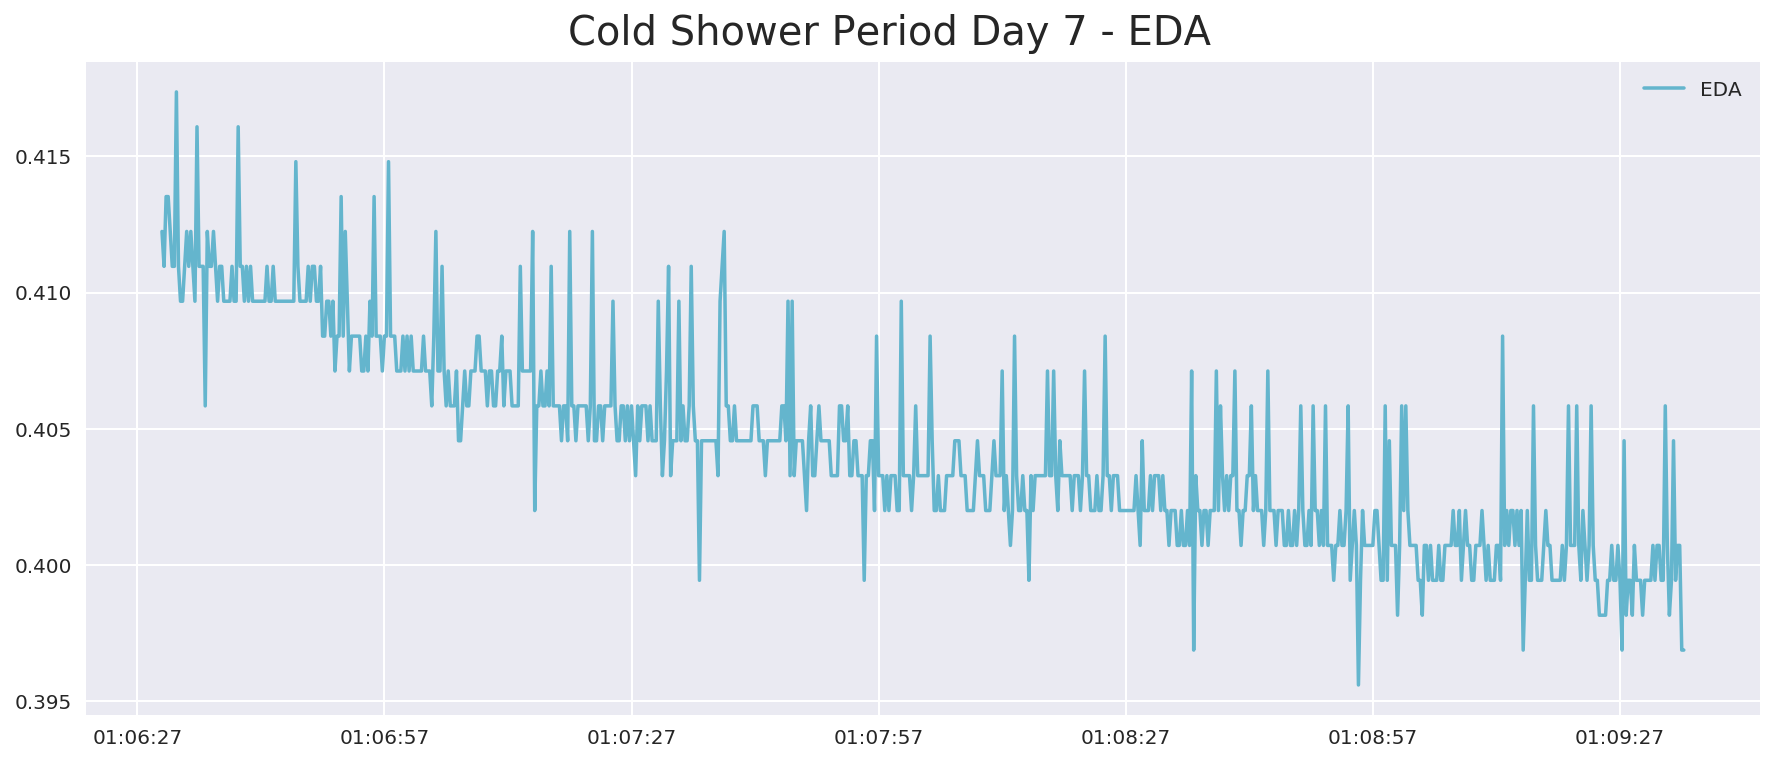

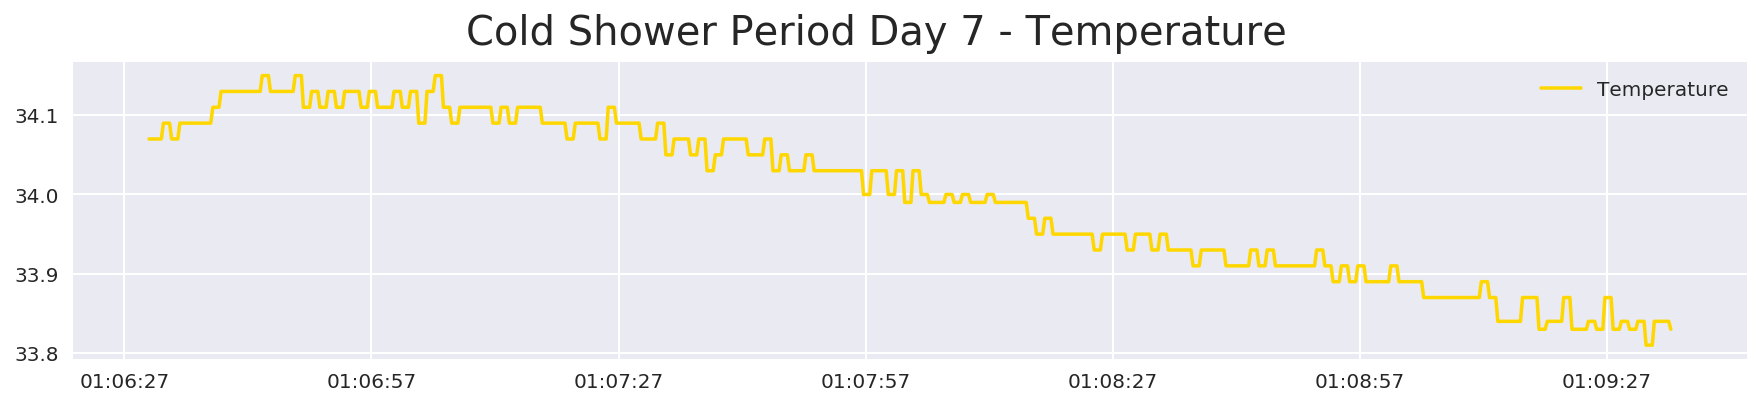

In [25]:
plt.figure(figsize=(15,6))
plt.subplot(111)

plt.plot(fl_cs_7['eda'],color ='c')
plt.figtext(.5,.9,'Cold Shower Period Day 7 - EDA ', fontsize=20, ha='center')
plt.legend(['EDA'],loc=1,fontsize='medium')

# plt.title('Cold Shower Experiment Day 0')
# plt.figtext(.5,.9,'Cold Shower Experiment Day 6', fontsize=20, ha='center')
plt.show()


plt.figure(figsize=(15,6))
plt.subplot(211)
plt.plot(fl_cs_7['temp'],color='gold')
plt.figtext(.5,.9,'Cold Shower Period Day 7 - Temperature ', fontsize=20, ha='center')

plt.legend(['Temperature'],loc=1,fontsize='medium')
# plt.axvline(x = tags_7.tagged_time[0],color = 'salmon',linestyle='--')
# plt.text(x=tags_7.tagged_time[0],y=0,s='pre-relaxation session begins',rotation=90)

# plt.title('Cold Shower Experiment Day 0')


In [33]:
from scipy import signal
n_peaks = signal.find_peaks_cwt(fl_cs_7['eda'],np.arange(0.1,0.2))
print('Number of SCRs: %s' % n_peaks)

Number of SCRs: [  7  12  14  17  22  25  34  37  41  43  51  54  65  71  77  83  87  89
  99 101 103 110 117 119 121 127 133 136 139 143 147 165 174 180 184 187
 189 198 209 219 226 228 231 237 241 246 251 253 257 273 278 304 306 315
 319 333 347 352 359 366 373 377 396 404 408 410 414 418 422 430 433 436
 448 454 458 473 476 480 486 495 498 500 502 512 514 517 521 529 531 537
 547 550 553 557 559 563 565 572 576 579 583 594 596 602 604 616 620 627
 630 633 641 644 651 653 658 660 663 666 672 680 683 687 690 694 704 707
 710 715 724 730 734]


## Visualization during Anticipatory period

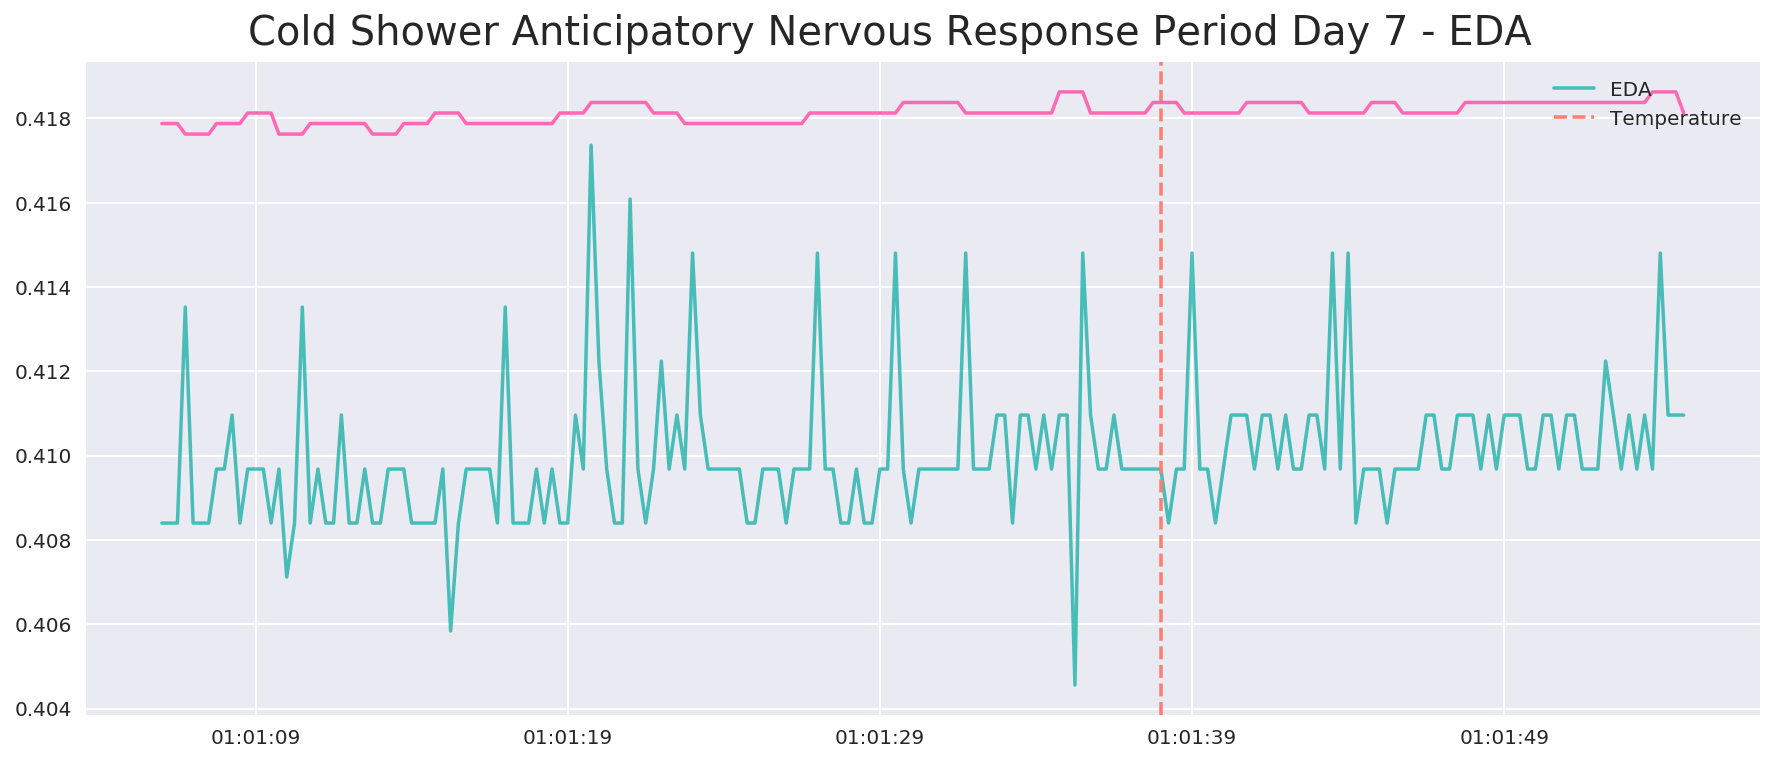

In [38]:
plt.figure(figsize=(15,6))
# plt.subplot(111)
plt.figtext(.5,.9,'Cold Shower Anticipatory Nervous Response Period Day 7 - EDA ', fontsize=20, ha='center')
plt.plot(fl_ar_7['eda'],color ='lightseagreen',alpha = 0.8)

# plt.legend(['EDA'],loc=1,fontsize='medium')
plt.axvline(x = tags_7.tagged_time[4],color = 'salmon',linestyle='--')
# plt.title('Cold Shower Experiment Day 0')
# plt.figtext(.5,.9,'Cold Shower Experiment Day 6', fontsize=20, ha='center')


# plt.figure(figsize=(15,8))
# plt.subplot(211)
plt.plot(fl_ar_7['temp']/80,color='hotpink')
# plt.figtext(.5,.9,'Cold Shower Anticipatory Nervous Response Period Day 7 - Temperature ', fontsize=20, ha='center')

plt.legend(['EDA','Temperature'],loc=1,fontsize='medium')
# plt.axvline(x = tags_7.tagged_time[4],color = 'salmon',linestyle='--')
# plt.text(x=tags_7.tagged_time[0],y=0,s='pre-relaxation session begins',rotation=90)
plt.show()

# plt.title('Cold Shower Experiment Day 0')


## Pearson Correlation Test Between EDA and Temperature

In [28]:
from scipy.stats.stats import pearsonr
pearsonr(fl_exp7['eda'], fl_exp7['temp'])

(0.6510557782475228, 0.0)

In [32]:
sho_t_e=pearsonr(fl_cs_7['eda'], fl_cs_7['temp'])
print('correlation coefficient during shower is: ',sho_t_e[0])

correlation coefficient during shower is:  0.8022244922594961


# CvxEDA Model - Phasic and Tonic Features

In [28]:
y7 = np.asarray(fl_exp7.eda)
y7[:10]

array([0.418642, 0.422483, 0.419923, 0.417362, 0.416082, 0.413521,
       0.409681, 0.409681, 0.4084  , 0.4084  ])

In [29]:
yn7 = (y7 - y7.mean()) / y7.std()
Fs = 4.
[r7, p7, t7, l7, d7, e7, obj7] = cvxEDA.cvxEDA(yn7, 1./Fs)

# pl.rcParams['figure.figsize'] = (30,20)
tm7 = pl.arange(1., len(y7)+1.) / Fs


     pcost       dcost       gap    pres   dres
 0: -3.7542e+03 -3.7137e+03  2e+04  1e+02  4e-01
 1: -3.7691e+03 -6.8380e+03  4e+03  3e+01  7e-02
 2: -3.7984e+03 -5.2240e+03  2e+03  9e+00  2e-02
 3: -3.8133e+03 -4.9359e+03  1e+03  6e+00  1e-02
 4: -3.8291e+03 -4.3594e+03  5e+02  2e+00  6e-03
 5: -3.8357e+03 -4.3121e+03  5e+02  2e+00  5e-03
 6: -3.8473e+03 -4.0990e+03  3e+02  9e-01  2e-03
 7: -3.8555e+03 -4.0211e+03  2e+02  5e-01  1e-03
 8: -3.8636e+03 -3.9449e+03  8e+01  2e-01  5e-04
 9: -3.8711e+03 -3.8989e+03  3e+01  5e-02  1e-04
10: -3.8772e+03 -3.8833e+03  6e+00  8e-03  2e-05
11: -3.8794e+03 -3.8806e+03  1e+00  1e-03  4e-06
12: -3.8799e+03 -3.8802e+03  2e-01  2e-04  5e-07
13: -3.8800e+03 -3.8801e+03  4e-02  3e-05  7e-08
14: -3.8800e+03 -3.8800e+03  5e-03  3e-06  7e-09
15: -3.8800e+03 -3.8800e+03  3e-04  1e-07  3e-10
16: -3.8800e+03 -3.8800e+03  8e-06  2e-09  5e-12
17: -3.8800e+03 -3.8800e+03  2e-07  3e-11  2e-13
Optimal solution found.


In [30]:
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 8),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pl.rcParams.update(params)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


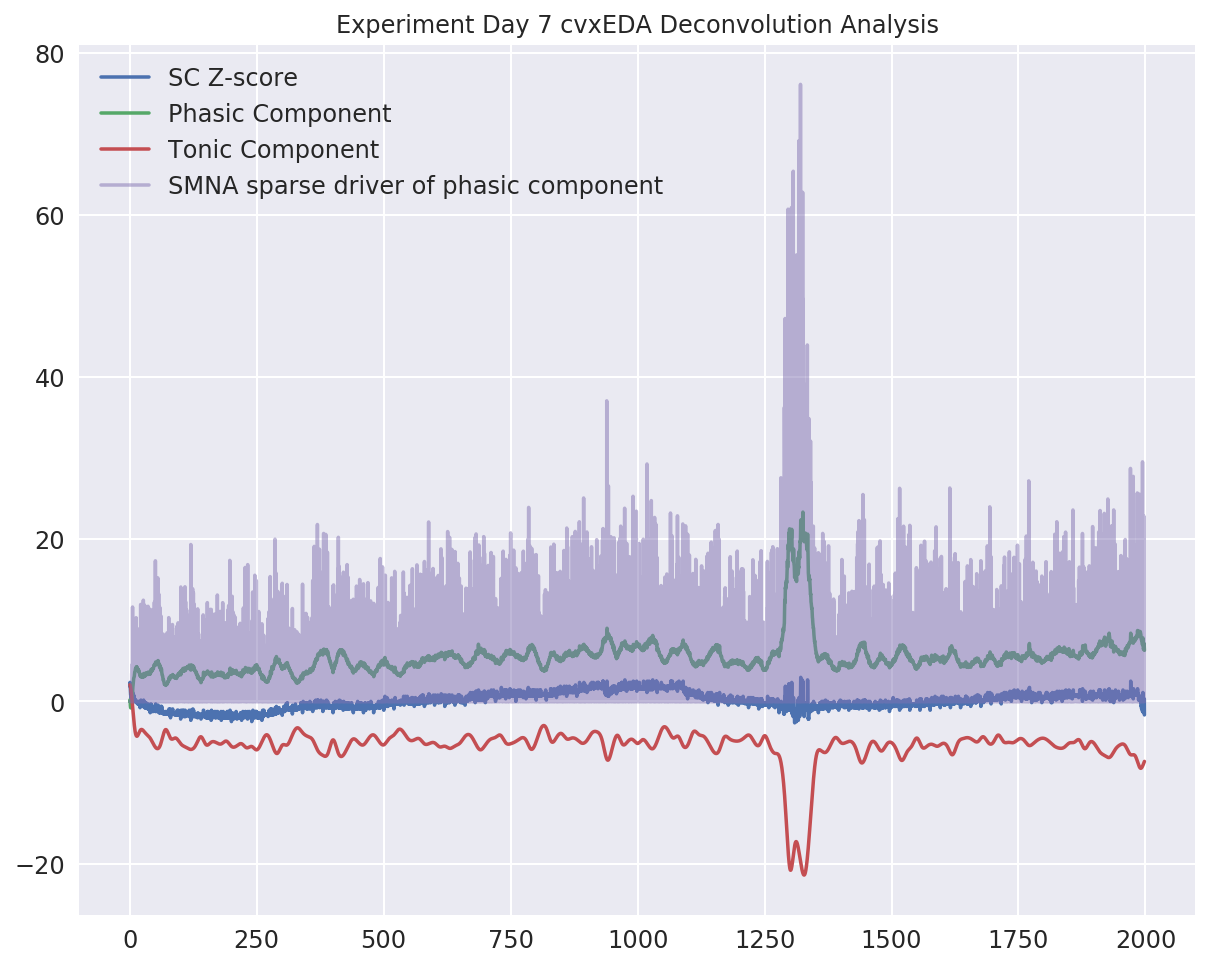

In [31]:
pl.hold(True)
pl.plot(tm7, yn7)
pl.plot(tm7, r7)
pl.plot(tm7, t7)
pl.plot(tm7, p7,alpha = 0.5)

pl.title('Experiment Day 7 cvxEDA Deconvolution Analysis')
pl.legend(['SC Z-score','Phasic Component','Tonic Component','SMNA sparse driver of phasic component',
           ])
plt.show()

# Pre- and Post-experiment Tonic component -  Paired wilcoxon-test

In [32]:
z_statistic, p_value = wilcoxon(fl_post_7.eda - fl_pre_7.eda)

/home/hf/.local/lib/python3.5/site-packages/scipy/stats/morestats.py:2388: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/home/hf/.local/lib/python3.5/site-packages/scipy/stats/morestats.py:2389: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


In [33]:
print("paired wilcoxon-test p-value", p_value)


paired wilcoxon-test p-value 0.0


# Feature extraction

In [33]:
def eda_feature(df):
    y = np.asarray(df.eda)
#     present = np.mean(df.present)
    yn = (y - y.mean()) / y.std()
    Fs = 4.
    [r, p, t, l, d, e, obj] = cvxEDA.cvxEDA(yn, 1./Fs)
    tm = pl.arange(1., len(y)+1.) / Fs
    
    y_mean = np.mean(yn)
    r_mean = np.mean(r)
    p_mean = np.mean(p)
    t_mean = np.mean(t)

    y_stdev = np.std(yn)
    r_stdev = np.std(r)
    p_stdev = np.std(p)
    t_stdev = np.std(t)

    y_max = np.amax(yn)
    r_max = np.amax(r)
    p_max = np.amax(p)
    t_max = np.amax(t)

    feature_list=[]
    feature_list.extend((y_mean,r_mean,p_mean,t_mean,
                    y_stdev,r_stdev,p_stdev,t_stdev,
                    y_max,r_max,p_max,t_max))
    return feature_list

In [34]:
var = [fl_pre_7,fl_post_7]
feature_arr = [eda_feature(x) for x in var]

     pcost       dcost       gap    pres   dres
 0: -5.4469e+02 -5.3848e+02  2e+03  4e+01  5e-01
 1: -5.4858e+02 -7.3471e+02  2e+02  5e+00  6e-02
 2: -5.5913e+02 -6.3002e+02  7e+01  1e+00  2e-02
 3: -5.6664e+02 -6.0161e+02  4e+01  6e-01  7e-03
 4: -5.7248e+02 -5.9221e+02  2e+01  3e-01  3e-03
 5: -5.7724e+02 -5.9159e+02  1e+01  1e-01  2e-03
 6: -5.8061e+02 -5.9003e+02  9e+00  7e-02  9e-04
 7: -5.8308e+02 -5.8920e+02  6e+00  4e-02  4e-04
 8: -5.8414e+02 -5.8863e+02  4e+00  2e-02  3e-04
 9: -5.8484e+02 -5.8736e+02  3e+00  1e-02  1e-04
10: -5.8529e+02 -5.8605e+02  8e-01  2e-03  2e-05
11: -5.8550e+02 -5.8562e+02  1e-01  2e-04  3e-06
12: -5.8554e+02 -5.8555e+02  1e-02  2e-05  3e-07
13: -5.8554e+02 -5.8554e+02  2e-03  2e-06  2e-08
14: -5.8554e+02 -5.8554e+02  6e-05  6e-08  8e-10
15: -5.8554e+02 -5.8554e+02  1e-06  1e-09  1e-11
16: -5.8554e+02 -5.8554e+02  3e-08  1e-11  3e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.0179e+02 -1.0058e+02  1e+04  9e+01  4e+0

# 2 sample t-test

In [38]:
t_statistic, p_value = ttest_1samp(np.asarray(feature_arr[0]) - np.asarray(feature_arr[1]), 0)

In [39]:
print('2-sample t-test p-value: ', p_value)

2-sample t-test p-value:  0.15444243921925765


# Two-sample wilcoxon test (a.k.a Mann Whitney U)

In [40]:
u, p_value = mannwhitneyu(feature_arr[0], feature_arr[1])
print("P-vale of two-sample wilcoxon-test", p_value)

P-vale of two-sample wilcoxon-test 0.15616071083810806
